In [1]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


####  1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [2]:
trans = pd.read_csv('Transactions.csv')
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [3]:
customer = pd.read_csv('Customer.csv')
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
prod_cat_info = pd.read_csv('prod_cat_info.csv')
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [12]:
prod_cat_info.rename(columns = {'prod_sub_cat_code' : 'prod_subcat_code'}, inplace = True)
prod_cat_info.head(1)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens


In [13]:
trans.rename(columns = {'cust_id' : 'customer_Id'}, inplace = True)
trans.head(1)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop


In [14]:
merge = pd.merge(left = trans, right = prod_cat_info, how = 'left', on = ['prod_cat_code', 'prod_subcat_code'])
merge.head(1)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women


In [15]:
Customer_Final = pd.merge(left = merge, right = customer, how = 'left', on = 'customer_Id')
Customer_Final.head(1)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,26-09-1981,M,5.0


In [16]:
Customer_Final.shape

(23053, 15)

### 2. Prepare a summary report for the merged data set.

####  a. Get the column names and their corresponding data types

In [17]:
Customer_Final.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [18]:
Customer_Final.dtypes

transaction_id        int64
customer_Id           int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
DOB                  object
Gender               object
city_code           float64
dtype: object

#### b. Top/Bottom 10 observations

In [20]:
Customer_Final.head(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,27-11-1979,F,3.0


In [21]:
Customer_Final.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,15-01-1982,M,1.0


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max

In [22]:
Customer_Final.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


### d. Frequency tables for all the categorical variables

In [23]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format = '%d-%m-%Y')
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   customer_Id       23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  prod_cat          23053 non-null  object        
 11  prod_subcat       23053 non-null  object        
 12  DOB               23053 non-null  datetime64[ns]
 13  Gender            23044 non-null  object        
 14  city_code         2304

In [24]:
pd.crosstab(index = Customer_Final.Store_type, columns = Customer_Final.prod_cat, margins = True)

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen,All
Store_type,,,,,,,
Flagship store,389,1223,584,996,574,811,4577
MBR,418,1224,626,953,609,831,4661
TeleShop,410,1175,576,949,599,795,4504
e-Shop,781,2447,1174,2000,1217,1692,9311
All,1998,6069,2960,4898,2999,4129,23053


In [25]:
pd.crosstab(index = Customer_Final.Store_type, columns = Customer_Final.prod_subcat, margins = True).T

Store_type,Flagship store,MBR,TeleShop,e-Shop,All
prod_subcat,,,,,
Academic,185,206,182,394,967
Audio and video,173,209,171,399,952
Bath,212,204,192,415,1023
Cameras,206,194,207,378,985
Children,233,182,197,423,1035
Comics,192,211,210,418,1031
Computers,201,188,187,382,958
DIY,189,205,206,389,989
Fiction,206,198,214,425,1043


In [26]:
pd.crosstab(index = Customer_Final.Store_type, columns = Customer_Final.Gender, margins = True)

Gender,F,M,All
Store_type,,,
Flagship store,2264,2313,4577
MBR,2264,2395,4659
TeleShop,2147,2353,4500
e-Shop,4558,4750,9308
All,11233,11811,23044


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [27]:
con_var = ['Qty', 'Rate', 'Tax', 'total_amt']

array([[<AxesSubplot:title={'center':'Qty'}>,
        <AxesSubplot:title={'center':'Rate'}>],
       [<AxesSubplot:title={'center':'Tax'}>,
        <AxesSubplot:title={'center':'total_amt'}>]], dtype=object)

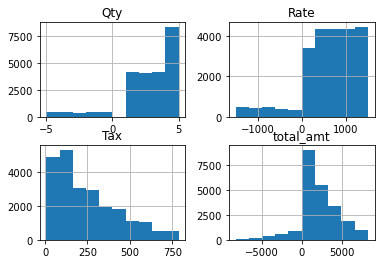

In [28]:
Customer_Final.hist(column = con_var)

<AxesSubplot:xlabel='Store_type'>

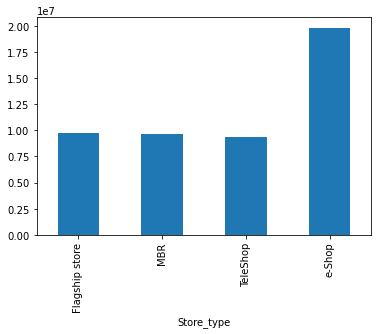

In [29]:
Customer_Final.groupby('Store_type').total_amt.sum().plot(kind = 'bar')

<AxesSubplot:xlabel='prod_cat'>

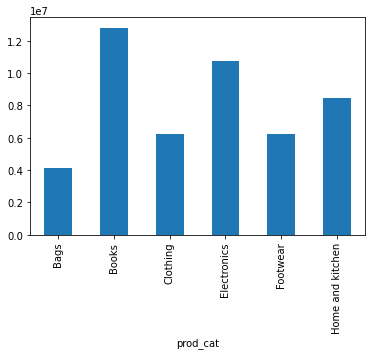

In [30]:
Customer_Final.groupby('prod_cat').total_amt.sum().plot(kind = 'bar')

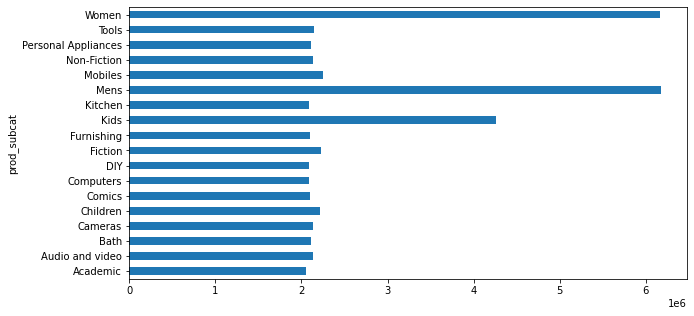

In [31]:
plt.figure(figsize = (10,5))
Customer_Final.groupby('prod_subcat').total_amt.sum().plot(kind = 'barh')
plt.show()

<AxesSubplot:xlabel='Gender'>

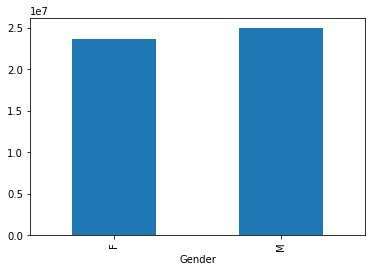

In [32]:
Customer_Final.groupby('Gender').total_amt.sum().plot(kind = 'bar')

## 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data


In [33]:
timeperiod = Customer_Final['tran_date'].max() - Customer_Final['tran_date'].min()
timeperiod

Timedelta('1430 days 00:00:00')

### b. Count of transactions where the total amount of transaction was negative

In [35]:
negative_trans = Customer_Final[Customer_Final['total_amt'] < 0].transaction_id.count()
negative_trans

2177

In [36]:
Customer_Final.loc[(Customer_Final.Qty < 0)].count()

transaction_id      2177
customer_Id         2177
tran_date           2177
prod_subcat_code    2177
prod_cat_code       2177
Qty                 2177
Rate                2177
Tax                 2177
total_amt           2177
Store_type          2177
prod_cat            2177
prod_subcat         2177
DOB                 2177
Gender              2176
city_code           2177
dtype: int64

### 5. Analyze which product categories are more popular among females vs male customers.
 

In [37]:
popular_cat = Customer_Final.groupby(['Gender', 'prod_cat']).Qty.sum().sort_values().tail(2)
popular_cat

Gender  prod_cat
F       Books       7070
M       Books       7587
Name: Qty, dtype: int64

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?



In [38]:
max_cust = Customer_Final.groupby('city_code').customer_Id.count().sort_values().tail(1)
max_cust

city_code
4.0    2422
Name: customer_Id, dtype: int64

In [39]:
percentage_of_cust = round((Customer_Final.groupby('city_code').customer_Id.count().sort_values().tail(1)/Customer_Final.customer_Id.count())*100,2)
percentage_of_cust

city_code
4.0    10.51
Name: customer_Id, dtype: float64

### 7. Which store type sells the maximum products by value and by quantity?

In [40]:
Customer_Final.groupby('Store_type')[['Rate', 'Qty']].sum().sort_values(by = 'Rate' , ascending = False).head(1)

,Rate,Qty
Store_type,,
e-Shop,5941001,22763


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [43]:
Customer_Final[Customer_Final.prod_cat.isin(['Electronics', 'Clothing']) & (Customer_Final.Store_type == 'Flagship store')].total_amt.sum()

3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [45]:
Customer_Final[(Customer_Final.prod_cat == 'Electronics') & (Customer_Final.Gender == 'M')].total_amt.sum()

5703109.424999999

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [46]:
positive_trans = Customer_Final[Customer_Final.total_amt > 0]
positive_trans.head(1)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0


In [47]:
unique = positive_trans.groupby('customer_Id').transaction_id.count().sort_values(ascending = False)

In [48]:
unique_count = pd.DataFrame(unique)

In [49]:
unique_count[unique_count.transaction_id > 10]

,transaction_id
customer_Id,
272741,11
273014,11
266794,11
274227,11
270803,11
270535,11


### 11. For all customers aged between 25 - 35, find out:

In [50]:
Customer_Final['age'] = round((Customer_Final.tran_date - Customer_Final.DOB).apply(lambda x : x.days)/365.25, 2)

In [51]:
Customer_Final.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,32.42
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0,40.80
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,21.58
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0,32.71
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,21.58


#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [52]:
Customer_Final[(Customer_Final.age >= 25) & (Customer_Final.age <= 35) & (Customer_Final.prod_cat.isin(['Electronics', 'Books']))].total_amt.sum()

10138087.7

#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [53]:
t_date = Customer_Final[(Customer_Final['tran_date'] >= '2014-01-01') & (Customer_Final['tran_date'] <= '2014-03-01')]

In [54]:
t_date.head(2)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,32.42
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0,40.80


In [55]:
t_date[(t_date.age >= 25) & (t_date.age <= 35) & (t_date.prod_cat.isin(['Electronics', 'Books']))].total_amt.sum()

268712.79500000004

# THANK YOU